In [6]:
from sklearn.preprocessing import LabelEncoder
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [7]:
# set the data type
dtypes = {'city_development_index': 'float', 
          'city':'str',
          'gender':'str',
          'relevent_experience':'str',
          'training_hours': 'float', 
          'target': 'int', 
          'enrolle_id': 'int',
          'city':'str',
          'enrollee_id':'str',
          'enrolled_university':'str',
          'education_level':'str', 
          'major_discipline':'str',
          'experience':'str',
          'company_size':'str',
          'last_new_job':'str'}

# read data
df_train = pd.read_csv("data//aug_train.csv", dtype=dtypes)
df_test = pd.read_csv("data//aug_test.csv", dtype=dtypes)

# different categorical data
con = ['city_development_index', 'training_hours']
cat = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 
       'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']

df_train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0


In [15]:
# missing values
(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False).round(4)[:9]

company_type           0.3205
company_size           0.3099
gender                 0.2353
major_discipline       0.1468
education_level        0.0240
last_new_job           0.0221
enrolled_university    0.0201
experience             0.0034
enrollee_id            0.0000
dtype: float64

In [8]:
def label_encode(train, test):
    label_dict = {}
    
    for column in ['city', 'gender', 'education_level', 'major_discipline','experience', 'relevent_experience', 
                   'company_size', 'company_type', 'last_new_job', 'training_hours','enrolled_university']:
        # initialize object
        le = LabelEncoder()
        le.fit(train[column])
        
        # store levels
        label = le.classes_.tolist()
        label_dict[column] = label
        
        # transfer columns
        train[column] = le.transform(train[column]).astype(int)
        test[column] = le.transform(test[column]).astype(int)
    return train, test, label_dict

df_train_notna, df_test_notna, label_dict = label_encode(df_train.dropna(), df_test.dropna()) 

In [18]:
df_train_notna.corr()[df_train_notna.corr().abs()>=0.4]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.422097
gender,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
company_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
company_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


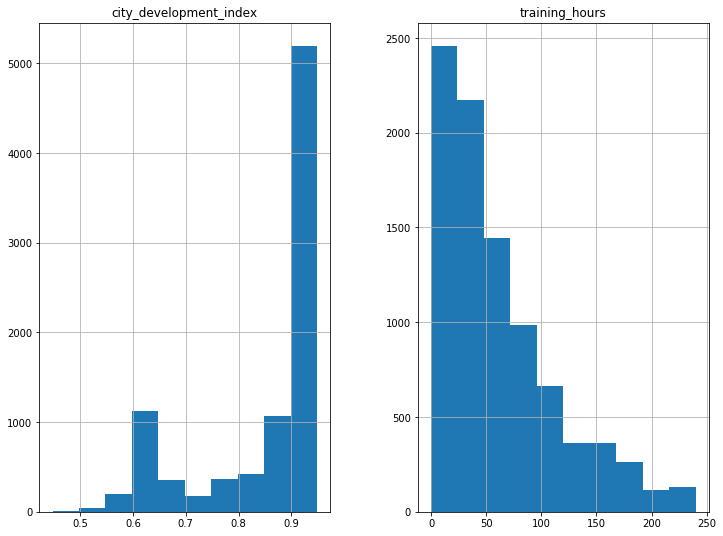

In [14]:
# continuous data
df_train_notna[con].hist(figsize=(12,9));

In [ ]:
# categorical data


In [19]:
def fillmiss(train, test):
    for df in [train, test]:
        df[['company_type','company_size','gender','major_discipline']].fillna('not known', inplace = True) 
        
    return train, test

df_train, df_test = fillmiss(df_train, df_test)

In [49]:
print(label_dict['company_size'])
df_train_notna['company_size'].value_counts().sort_index()

['10/49', '100-500', '1000-4999', '10000+', '50-99', '500-999', '5000-9999', '<10']


0     951
1    1814
2     930
3    1449
4    1986
5     592
6     393
7     840
Name: company_size, dtype: int64

# Predict the probability of an candidate looking for a new job